# 🧼📊 Clean + Explore: IMLS Public Library Survey (FY 2022)

This notebook loads the raw FY 2022 IMLS dataset, cleans it, and explores trends in U.S. public library usage.

> ⚠️ **Note for Colab users**: First upload the raw file `PLS_FY22_AE_pud22i.csv` using the file upload button on the left sidebar.


In [1]:
# 📦 Install if running in Colab
# %pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 📂 Load the raw data (uploaded in root directory for Colab users)
df_raw = pd.read_csv("PLS_FY22_AE_pud22i.csv", encoding="ISO-8859-1")
df_raw.head()


,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,ZIP4,ADDRES_M,CITY_M,...,GEOSCORE,GEOMTYPE,C19CLOSE,C19PUBSV,C19ECRD2,C19REFER,C19OUTSD,C19XWIF2,C19XWIF3,C19STOTH
0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,9150,P.O. BOX 129,ANCHOR POINT,...,100.00,POINTADDRESS,M,M,M,N,M,M,M,M
1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,6055,3600 DENALI STREET,ANCHORAGE,...,100.00,POINTADDRESS,N,Y,N,Y,N,N,Y,N
2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,M,P.O. BOX 3078,ANDERSON,...,99.62,STREETADDRESS,Y,Y,Y,Y,N,Y,N,Y
3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,M,P.O. BOX 368,BETHEL,...,100.00,MANUAL,N,N,N,N,N,N,N,N
4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,WASILLA,99623,9663,P.O. BOX 520829,BIG LAKE,...,99.58,POINTADDRESS,Y,Y,Y,Y,Y,N,N,N


## 🔧 Step 1: Clean and Prepare Key Fields

In [3]:
df = df_raw.rename(columns={
    "LIBNAME": "Library Name",
    "STABR": "State",
    "VISITS": "Visits",
    "TOTPRO": "Total Programs",
    "TOTCIR": "Circulation"
})[["Library Name", "State", "Visits", "Total Programs", "Circulation"]]

# Replace special negative values with NaN
df = df.replace({-1: None, -3: None, -4: None, -9: None})

# Drop rows where all key metrics are missing
df = df.dropna(subset=["Visits", "Total Programs", "Circulation"], how="all")
df.head()


,Library Name,State,Visits,Total Programs,Circulation
0,ANCHOR POINT PUBLIC LIBRARY,AK,5127,150,8684
1,ANCHORAGE PUBLIC LIBRARY,AK,261807,758,880890
2,ANDERSON COMMUNITY LIBRARY,AK,421,None,766
3,KUSKOKWIM CONSORTIUM LIBRARY,AK,12817,80,9980
4,BIG LAKE PUBLIC LIBRARY,AK,27063,249,28701


In [4]:
df.isnull().sum()

,0
Library Name,0
State,0
Visits,3
Total Programs,426
Circulation,3


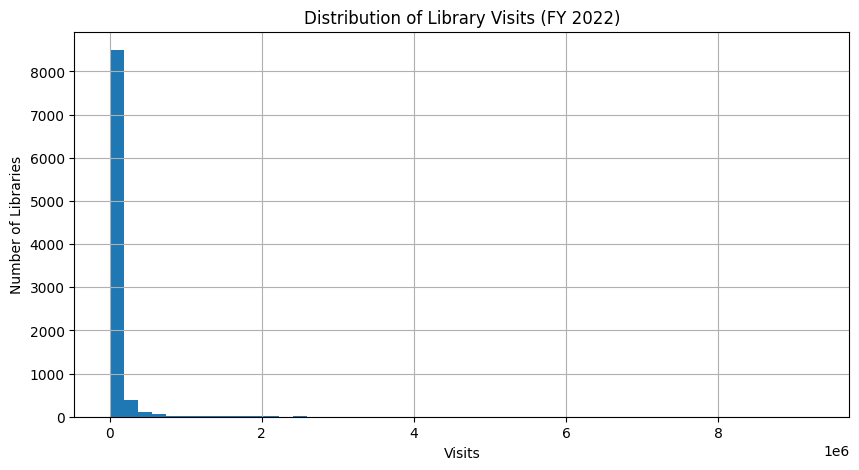

In [5]:
plt.figure(figsize=(10, 5))
df['Visits'].dropna().hist(bins=50)
plt.title("Distribution of Library Visits (FY 2022)")
plt.xlabel("Visits")
plt.ylabel("Number of Libraries")
plt.grid(True)
plt.show()


In [6]:
top10 = df[['Library Name', 'Total Programs']].sort_values(by='Total Programs', ascending=False).head(10)
top10.reset_index(drop=True, inplace=True)
top10


,Library Name,Total Programs
0,"NEW YORK PUBLIC LIBRARY, THE BRANCH LIBRARIES",63598
1,QUEENS BOROUGH PUBLIC LIBRARY,31173
2,LAS VEGAS-CLARK COUNTY LIBRARY DISTRICT,20244
3,MIAMI-DADE PUBLIC LIBRARY SYSTEM,18013
4,BROOKLYN PUBLIC LIBRARY,17061
5,CHICAGO PUBLIC LIBRARY,16503
6,HARRIS COUNTY PUBLIC LIBRARY,14841
7,FREE LIBRARY OF PHILADELPHIA,14159
8,OCEAN COUNTY LIBRARY,13690
9,CINCINNATI AND HAMILTON COUNTY PUBLIC LIBRARY,11433


In [7]:
df.to_csv("imls_pls_2022_cleaned.csv", index=False)
print("✅ Cleaned file saved as: imls_pls_2022_cleaned.csv")


✅ Cleaned file saved as: imls_pls_2022_cleaned.csv
